<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/notebooks/05b-eda-penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# Palmer Penguins Dataset: Overview

The Palmer Penguins dataset contains data about three species of penguins observed in the Palmer Archipelago, Antarctica. The dataset was collected by Dr. Kristen Gorman and the Palmer Station LTER (Long Term Ecological Research) Program. It serves as a popular alternative to the Iris dataset for data exploration, statistical analysis, and machine learning practice due to its richer set of features and categorical variables.

Objective:

The primary goal of working with the Palmer Penguins dataset is to explore relationships between penguin species and their physical characteristics, as well as to perform classification tasks, such as predicting the species of a penguin based on measurable features. The dataset also offers an opportunity to practice data cleaning and handling missing values, as there are some missing entries.

Dataset Features:

The dataset consists of 344 rows and 7 columns. The columns are:

	1.	species: Categorical feature indicating the penguin species (Adélie, Chinstrap, Gentoo).
	2.	island: Categorical feature representing the island where the penguin was observed (Biscoe, Dream, Torgersen).
	3.	bill_length_mm: Continuous numerical feature representing the length of the penguin’s bill (in millimeters).
	4.	bill_depth_mm: Continuous numerical feature representing the depth of the penguin’s bill (in millimeters).
	5.	flipper_length_mm: Continuous numerical feature representing the penguin’s flipper length (in millimeters).
	6.	body_mass_g: Continuous numerical feature representing the penguin’s body mass (in grams).
	7.	sex: Categorical feature indicating the penguin’s sex (male or female), though some entries are missing.


## As you work through the below steps, keep track of (write down) any questions that come to mind. Seek to answer these questions using the data!

1.	Understand the Data:
	* The dataset is loaded from seaborn.
	* First few rows and data types are printed.
	* Missing values are checked.
2.	Detect and Address Outliers and Missing Values:
	* Visualizing missing values using a heatmap.
  * Boxplots for detecting potential outliers.
	* Decide whether to drop or impute missing values.
3.	Describe Shape of Data using Univariate Analysis:
	* Histograms for numerical variables to check distributions.
	* Count plots for categorical variables like species.
4.	Identify Feature Relationships using Bivariate Analysis:
	* Scatter plots and pair plots to visualize relationships between numerical variables and categories.
	* Correlation matrix heatmap to examine the relationships between numerical variables.
5.	Multivariate Analysis:
	* Grouping box plots to compare flipper lengths across species and gender.
6.  What other questions come to mind?

In [9]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Palmer Penguins dataset from seaborn
penguins = sns.load_dataset('penguins')
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [11]:
penguins.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


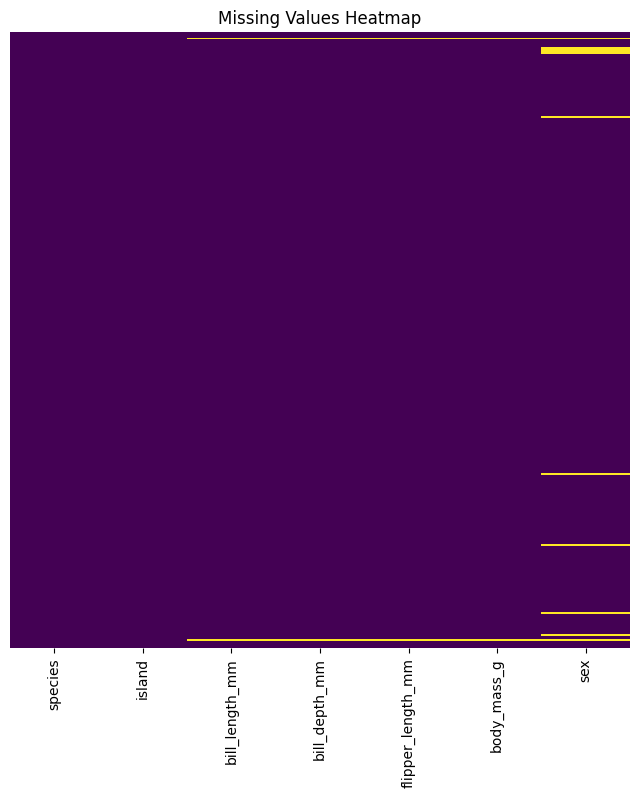

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(penguins.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [20]:
penguins_cleaned = penguins.dropna()
print(penguins_cleaned.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


Text(0.5, 1.0, 'Bolxplot of Numeric Feature')

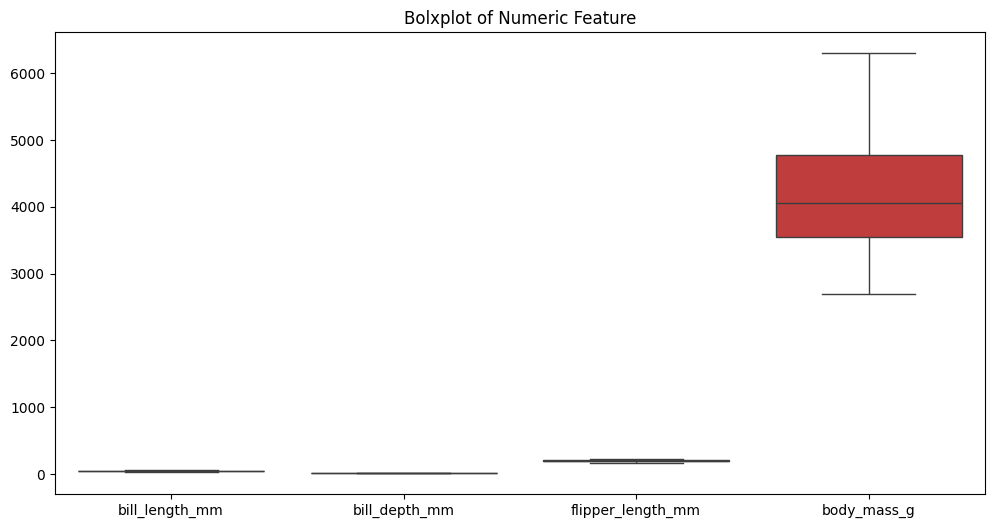

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=penguins_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
plt.title('Bolxplot of Numeric Feature')


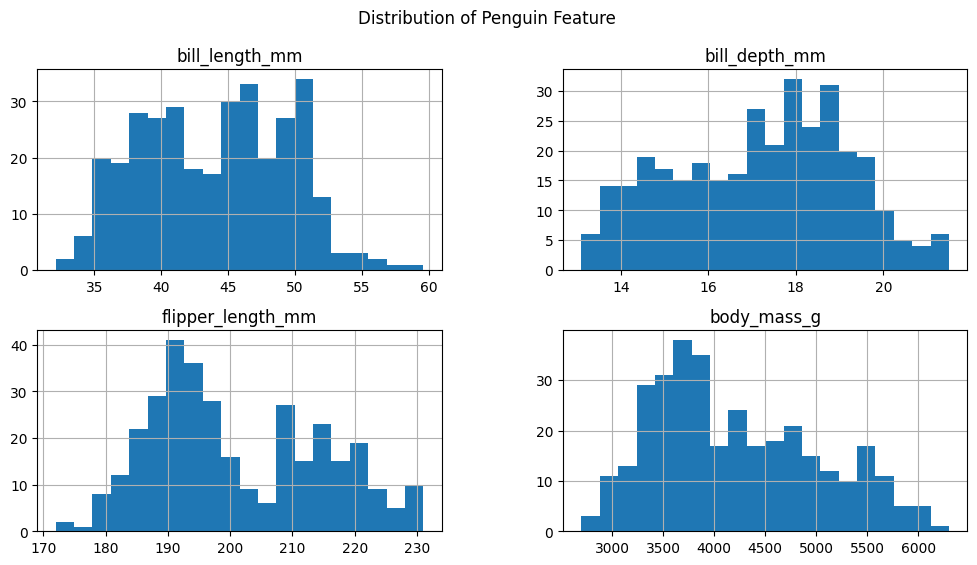

In [27]:
penguins_cleaned[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].hist(figsize=(12,6), bins=20)
plt.suptitle("Distribution of Penguin Feature")
plt.show()

<ipython-input-30-f80be4c094b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=penguins_cleaned, palette='viridis')


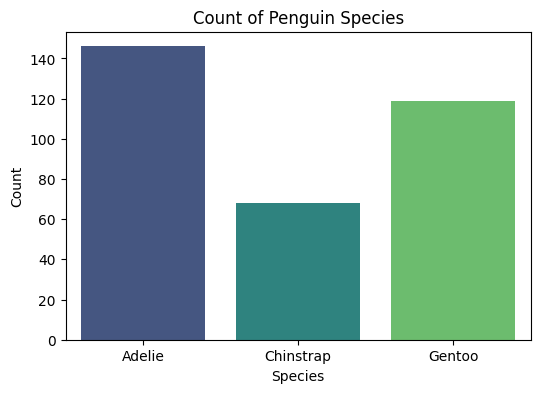

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='species', data=penguins_cleaned, palette='viridis')
plt.title("Count of Penguin Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='')

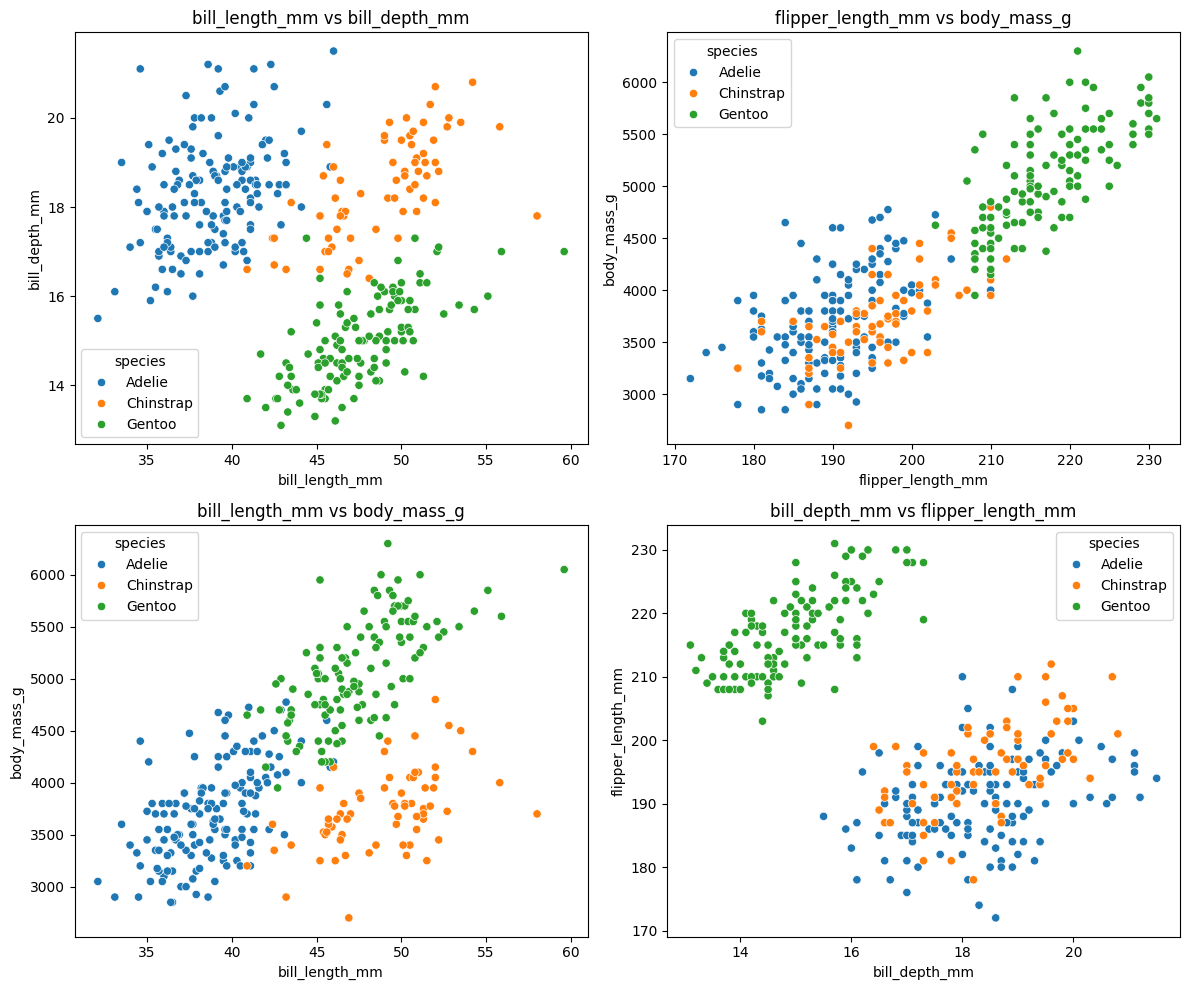

In [32]:
# Define feature pairs for bivariate analysis
feature_pairs = [
    ('bill_length_mm', 'bill_depth_mm'),
    ('flipper_length_mm', 'body_mass_g'),
    ('bill_length_mm', 'body_mass_g'),
    ('bill_depth_mm', 'flipper_length_mm')
]

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid

# Loop through feature pairs and create scatter plots
for ax, (x_feature, y_feature) in zip(axes.flatten(), feature_pairs):
    sns.scatterplot(data=penguins_cleaned, x=x_feature, y=y_feature, hue='species', ax=ax)
    ax.set_title(f"{x_feature} vs {y_feature}")

plt.tight_layout()
plt.show()

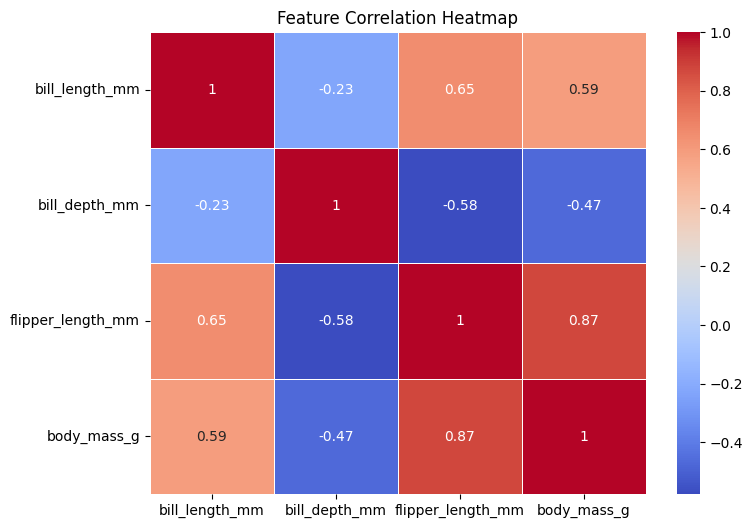

In [36]:
# Manually selecting numerical columns
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

plt.figure(figsize=(8, 6))
sns.heatmap(penguins_cleaned[numeric_columns].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


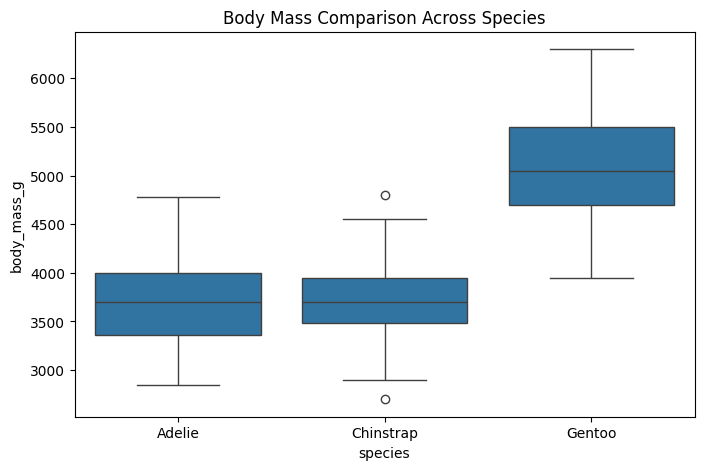

In [34]:
# Boxplot comparing body mass across species
plt.figure(figsize=(8, 5))
sns.boxplot(x='species', y='body_mass_g', data=penguins_cleaned)
plt.title("Body Mass Comparison Across Species")
plt.show()
